# Predict the diagnostic of Breast cancer

## dataset description
Breast cancer data includes 569 observations of cancer biopsies, each with 32 characteristics (variables).
One feature is an identification number (ID), another is a cancer diagnosis, and 30 are numerical
laboratory measurements. The diagnosis is coded as "M" to indicate malignant or "B" for indicate benign.

## our goal
1. apply cross-validation first to identify the better algorithm (accuracy) to be used
2. develop a strategy to improve the accuracy based on hypermeters to achieve the best % of accuracy.

## Read the data and analyze

In [151]:
import pandas as pd 
import numpy as np 
from sklearn import tree, preprocessing
from sklearn.model_selection import train_test_split
from pandas import Series,DataFrame

data_df = pd.read_csv('./dataset.csv') 
data_df.shape
data_df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,points_worst,symmetry_worst,dimension_worst
0,87139402,B,12.32,12.39,78.85,464.1,0.10280,0.06981,0.03987,0.03700,...,13.50,15.64,86.97,549.1,0.1385,0.1266,0.12420,0.09391,0.2827,0.06771
1,8910251,B,10.60,18.95,69.28,346.4,0.09688,0.11470,0.06387,0.02642,...,11.88,22.94,78.28,424.8,0.1213,0.2515,0.19160,0.07926,0.2940,0.07587
2,905520,B,11.04,16.83,70.92,373.2,0.10770,0.07804,0.03046,0.02480,...,12.41,26.44,79.93,471.4,0.1369,0.1482,0.10670,0.07431,0.2998,0.07881
3,868871,B,11.28,13.39,73.00,384.8,0.11640,0.11360,0.04635,0.04796,...,11.92,15.77,76.53,434.0,0.1367,0.1822,0.08669,0.08611,0.2102,0.06784
4,9012568,B,15.19,13.21,97.65,711.8,0.07963,0.06934,0.03393,0.02657,...,16.20,15.73,104.50,819.1,0.1126,0.1737,0.13620,0.08178,0.2487,0.06766


In [152]:
data_df.shape

(569, 32)

## EDA: Exploratory Data Analysis




In [153]:
# statistical data
data_df.describe()

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,points_worst,symmetry_worst,dimension_worst
count,5.690000e+02,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,3.037183e+07,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,1.250206e+08,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,8.670000e+03,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,8.692180e+05,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,9.060240e+05,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,8.813129e+06,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,9.113205e+08,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


In [154]:
# % distribution of values outcome
(data_df["diagnosis"].value_counts()*100)/len(data_df)

B    62.741652
M    37.258348
Name: diagnosis, dtype: float64

In [155]:
# Is there any missing vaue ?
data_df.isnull().sum()

id                   0
diagnosis            0
radius_mean          0
texture_mean         0
perimeter_mean       0
area_mean            0
smoothness_mean      0
compactness_mean     0
concavity_mean       0
points_mean          0
symmetry_mean        0
dimension_mean       0
radius_se            0
texture_se           0
perimeter_se         0
area_se              0
smoothness_se        0
compactness_se       0
concavity_se         0
points_se            0
symmetry_se          0
dimension_se         0
radius_worst         0
texture_worst        0
perimeter_worst      0
area_worst           0
smoothness_worst     0
compactness_worst    0
concavity_worst      0
points_worst         0
symmetry_worst       0
dimension_worst      0
dtype: int64

In [156]:
#Is there any duplicated?
data_df.duplicated()

0      False
1      False
2      False
3      False
4      False
       ...  
564    False
565    False
566    False
567    False
568    False
Length: 569, dtype: bool

Actually we can the these above info using sweetviz and details of data distribution

In [157]:
import sweetviz as sv 
data_df_report = sv.analyze(data_df)
data_df_report.show_html()

:FEATURES DONE:                    |█████████████████████| [100%]   00:35  -> (00:00 left)
:PAIRWISE DONE:                    |█████████████████████| [100%]   00:00  -> (00:00 left)


Creating Associations graph... DONE!
Report SWEETVIZ_REPORT.html was generated! NOTEBOOK/COLAB USERS: no browser will pop up, the report is saved in your notebook/colab files.


## Cross Validation

In [158]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import accuracy_score

set features and lable

In [159]:
X = data_df.drop(['id','diagnosis'], axis=1)
Y = data_df['diagnosis']

# pandas.get_dummies() is used for data manipulation. It converts categorical data into dummy or indicator variables.
Y = pd.get_dummies(Y, columns =['diagnosis'], drop_first = True)

X.shape, Y.shape

print(Y)

     M
0    0
1    0
2    0
3    0
4    0
..  ..
564  0
565  0
566  1
567  0
568  1

[569 rows x 1 columns]


In [160]:
# Train/Test split
X_train_cross, X_test_cross, y_train_cross, y_test_cross = train_test_split(X, Y, stratify = Y, test_size = 0.3,random_state=0)

X_train_cross.shape, X_test_cross.shape

((398, 30), (171, 30))

### Cross_val_score

In [161]:
models = []

models.append(('KNN', KNeighborsClassifier()))
models.append(('DT', DecisionTreeClassifier()))
models.append(('RF', RandomForestClassifier()))

In [162]:
strat_k_fold = StratifiedKFold(n_splits=10)

names = []
scores = []

for name, model in models:
    score = cross_val_score(model, X, Y.values.ravel(), cv=strat_k_fold, scoring='accuracy').mean()
    names.append(name)
    scores.append(score)

kf_cross_val = pd.DataFrame({'Name': names, 'Score': scores})
print(kf_cross_val)

  Name     Score
0  KNN  0.933302
1   DT  0.922682
2   RF  0.964881


#### Draw barplot to easy check which algorithm is best

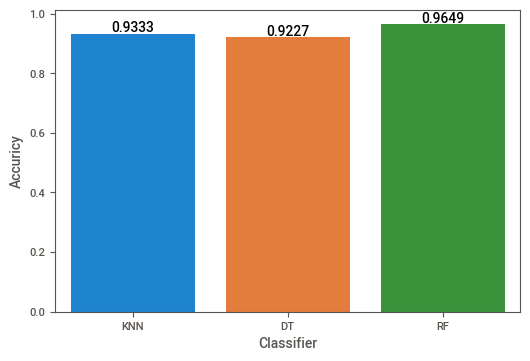

In [163]:
import seaborn as sns
import matplotlib.pyplot as plt

axis = sns.barplot(x = 'Name', y = 'Score', data= kf_cross_val)

axis.set(xlabel = 'Classifier', ylabel = 'Accuricy')

for p in axis.patches:
    height = p.get_height()
    axis.text(p.get_x() + p.get_width()/2, height + 0.005, '{:.4f}'.format(height), ha="center") 
    
plt.show()

we can see that using radomforest has the best accuracy for this dataset.

## Explore the better accuracy

### 1. We the set some parameters to each algorithm to see if they have better accruacy. 

In [164]:
models = []

models.append(('KNN', KNeighborsClassifier(n_neighbors=6)))
models.append(('DT', DecisionTreeClassifier(criterion = "entropy", splitter = "random", max_depth = 4,  min_samples_split = 5,
                              min_samples_leaf = 2)))
models.append(('RF', RandomForestClassifier(criterion = 'entropy', n_estimators = 100, random_state = 42)))

In [165]:
strat_k_fold = StratifiedKFold(n_splits=10)

names = []
scores = []

for name, model in models:
    score = cross_val_score(model, X, Y.values.ravel(), cv=strat_k_fold, scoring='accuracy').mean()
    names.append(name)
    scores.append(score)

kf_cross_val = pd.DataFrame({'Name': names, 'Score': scores})
print(kf_cross_val)

  Name     Score
0  KNN  0.936748
1   DT  0.927976
2   RF  0.964881


From above, the accuracy of these model is a little bit more better by set parampters for each algorithm,  it need to practice a lot to get the best accuracy

### 2. We try to change the percentage of test dataset and train dataset to see if it will effect the accruacy

In [166]:
# Train/Test split
X_train_cross, X_test_cross, y_train_cross, y_test_cross = train_test_split(X, Y, stratify = Y, test_size = 0.1,random_state=0)

X_train_cross.shape, X_test_cross.shape

((512, 30), (57, 30))

In [167]:
models = []

models.append(('KNN', KNeighborsClassifier(n_neighbors=6)))
models.append(('DT', DecisionTreeClassifier(criterion = "entropy", splitter = "random", max_depth = 4,  min_samples_split = 5,
                              min_samples_leaf = 2)))
models.append(('RF', RandomForestClassifier(criterion = 'entropy', n_estimators = 100, random_state = 42)))

strat_k_fold = StratifiedKFold(n_splits=10)

names = []
scores = []

for name, model in models:
    score = cross_val_score(model, X, Y.values.ravel(), cv=strat_k_fold, scoring='accuracy').mean()
    names.append(name)
    scores.append(score)

kf_cross_val = pd.DataFrame({'Name': names, 'Score': scores})
print(kf_cross_val)


  Name     Score
0  KNN  0.936748
1   DT  0.943860
2   RF  0.964881


As the whole dataset is not much, so there is no much difference of accruacy by different percentage of train and data set 

### 3. Try to use some features to build model

For example,  we use mean,  se, and wrose to build model, we can see that se has the badest accuracy,  use all of them are more accuracy

In [170]:
X = pd.DataFrame(data_df[:], columns = data_df.columns[2:12])   #use mean
#X = pd.DataFrame(data_df[:], columns = data_df.columns[12:22])   #use se
#X = pd.DataFrame(data_df[:], columns = data_df.columns[22:32])  #use worse
Y = data_df['diagnosis']

# pandas.get_dummies() is used for data manipulation. It converts categorical data into dummy or indicator variables.
Y = pd.get_dummies(Y, columns =['diagnosis'], drop_first = True)

X.shape, Y.shape

print(X)

     radius_mean  texture_mean  perimeter_mean  area_mean  smoothness_mean  \
0          12.32         12.39           78.85      464.1          0.10280   
1          10.60         18.95           69.28      346.4          0.09688   
2          11.04         16.83           70.92      373.2          0.10770   
3          11.28         13.39           73.00      384.8          0.11640   
4          15.19         13.21           97.65      711.8          0.07963   
..           ...           ...             ...        ...              ...   
564        13.17         18.22           84.28      537.3          0.07466   
565        10.26         14.71           66.20      321.6          0.09882   
566        15.28         22.41           98.92      710.6          0.09057   
567        14.53         13.98           93.86      644.2          0.10990   
568        21.37         15.10          141.30     1386.0          0.10010   

     compactness_mean  concavity_mean  points_mean  symmetry_me

In [171]:
# Train/Test split
X_train_cross, X_test_cross, y_train_cross, y_test_cross = train_test_split(X, Y, stratify = Y, test_size = 0.2,random_state=0)

X_train_cross.shape, X_test_cross.shape


#modeling and accuracy
models = []

models.append(('KNN', KNeighborsClassifier(n_neighbors=6)))
models.append(('DT', DecisionTreeClassifier(criterion = "entropy", splitter = "random", max_depth = 4,  min_samples_split = 5,
                              min_samples_leaf = 2)))
models.append(('RF', RandomForestClassifier(criterion = 'entropy', n_estimators = 100, random_state = 42)))

strat_k_fold = StratifiedKFold(n_splits=10)

names = []
scores = []
for name, model in models:
    score = cross_val_score(model, X, Y.values.ravel(), cv=strat_k_fold, scoring='accuracy').mean()
    names.append(name)
    scores.append(score)

kf_cross_val = pd.DataFrame({'Name': names, 'Score': scores})
print(kf_cross_val)


  Name     Score
0  KNN  0.892794
1   DT  0.914004
2   RF  0.945551
